In [3]:
import pandas as pd
import re
# import seaborn as sns
# import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("/Users/saeedazad/Desktop/Projects/airbnb-data-analysis/Airbnb_Open_Data.csv", low_memory=False)

In [8]:
df1= df.copy()

In [9]:
df1.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
## find each house distance from LaGuardia Airport (LGA)that handles most of domestic flies in New york city.
from geopy.distance import geodesic
airport_point = (40.776863, -73.874069)
def calculate_distance(row):
    point = (row['lat'], row['long'])
    return geodesic(airport_point, point).kilometers

In [17]:
df1.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [6]:
df1.columns = df1.columns.str.replace(' ', '_')

In [7]:
df1['price'] = pd.to_numeric(df1['price'].str.replace('[$,]', '', regex=True), errors='coerce')

In [8]:
df1.shape

(102599, 26)

In [6]:
clean_df = pd.read_csv("/Users/saeedazad/clean_airbnb_data.csv")
df = clean_df.copy()
df.head()

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,142.0,28.0,13.5,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,True,...,620.0,124.0,3.0,0.0,2019-06-23,0.79,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,1002755,blank,85098326012,unconfirmed,blank,Brooklyn,Clinton Hill,40.68514,-73.95976,True,...,368.0,74.0,13.5,270.0,2019-07-05,4.64,4.0,1.0,322.0,blank
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."


In [8]:
df['distance_to_airport'] = df.apply(calculate_distance, axis=1)

In [9]:
df['distance_to_airport'] = df['distance_to_airport'].round(2)


In [55]:
max_distance = df[df['distance_to_airport']== min(df['distance_to_airport'])]
max_distance

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,distance_to_airport
53440,30516248,"Cozy Near LGA, Center of Queens RM1",48860548288,unconfirmed,Zahir,Queens,East Elmhurst,40.77462,-73.87086,False,...,163.0,1.0,308.0,2022-02-17,6.6,4.0,8.0,349.0,blank,0.37


In [10]:
df1.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [18]:
hosts = df[['host_id', 'host_name', 'host_identity_verified', 'calculated_host_listings_count']].drop_duplicates()


In [51]:
df1.columns = df1.columns.str.replace(' ', '_')

In [57]:
df1.loc[df1.duplicated()].head()

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
102058,35506831,Master Bedroom with private Bathroom & Balcony,55110690425,unconfirmed,UZeyir,Queens,Maspeth,40.74056,-73.90635,United States,...,$141,1.0,1.0,11/14/2021,0.27,3.0,1.0,339.0,NaN,NaN
102059,35507383,Cozy 2 br in sunny Fort Greene apt,80193772189,verified,Sally,Brooklyn,Fort Greene,40.68701,-73.97555,United States,...,$130,3.0,38.0,11/13/2021,0.27,3.0,1.0,0.0,NaN,NaN
102060,35507935,Duplex w/ Terrace @ Box House Hotel,72991962259,verified,The Box House Hotel,Brooklyn,Greenpoint,40.73756,-73.95350,United States,...,$181,3.0,10.0,11/13/2021,0.08,3.0,30.0,32.0,NaN,NaN
102061,35508488,"Cozy, clean Greenpoint room with yard access",74975156081,verified,Dawn,Brooklyn,Greenpoint,40.72516,-73.95004,United States,...,$118,30.0,38.0,11/13/2021,0.34,5.0,2.0,324.0,NaN,NaN
102062,35509040,2BR XL Loft: Cleaning CDC guidelines implemented,85844415221,unconfirmed,Vida,Brooklyn,Greenpoint,40.72732,-73.94185,United States,...,$71,30.0,13.0,11/13/2021,0.14,4.0,28.0,336.0,NaN,NaN


In [58]:
df1['price'] = pd.to_numeric(df1['price'].str.replace('[$,]','',regex=True),errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69305 entries, 0 to 69304
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69305 non-null  int64  
 1   NAME                            69305 non-null  object 
 2   host_id                         69305 non-null  int64  
 3   host_identity_verified          69305 non-null  object 
 4   host_name                       69305 non-null  object 
 5   neighbourhood_group             69305 non-null  object 
 6   neighbourhood                   69305 non-null  object 
 7   lat                             69305 non-null  float64
 8   long                            69305 non-null  float64
 9   instant_bookable                69305 non-null  bool   
 10  cancellation_policy             69305 non-null  object 
 11  room_type                       69305 non-null  object 
 12  Construction_year               

In [43]:
data = hosts.loc[(hosts['host_id']==29531702698) &  (hosts['calculated_host_listings_count']==6.0) ]
# df.drop(index=42960, inplace=True)
data

,host_id,host_name,host_identity_verified,calculated_host_listings_count
23397,29531702698,Ann,verified,6.0


In [41]:
hosts.drop(index=42960, inplace=True)

In [45]:
hosts.to_sql('hosts', engine, index=False, if_exists='append')

304

In [46]:
listings = df[[
    'id', 'NAME', 'host_id', 'neighbourhood_group', 'neighbourhood', 
    'lat', 'long', 'room_type', 'Construction_year', 'price', 
    'service_fee', 'minimum_nights', 'availability_365', 'instant_bookable', 'cancellation_policy'
]].drop_duplicates()

In [62]:
reviews = df[['id', 'number_of_reviews', 'last_review', 
    'reviews_per_month', 'review_rate_number']].drop_duplicates()

In [63]:
reviews = reviews.reset_index(drop=True).reset_index()
reviews.rename(columns={'index': 'review_id', 'id': 'listing_id'}, inplace=True)


In [53]:
listings.to_sql('listings', engine, index=False, if_exists='append')

304

In [66]:
reviews.to_sql('reviews', engine, index=False, if_exists='replace')

305

In [26]:
df1['neighbourhood_group']=df1['neighbourhood_group'].str.replace('brookln', 'Brooklyn').str.replace('manhatan', 'Manhattan')

In [7]:
df1.columns

Index(['id', 'NAME', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'Construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

In [123]:
df1['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        29587
Brooklyn         27895
Queens            9262
Bronx             1911
Staten Island      649
The Bronx            1
Name: count, dtype: int64

In [122]:
df1.shape

(69305, 26)

In [29]:
df1.drop(columns='license', inplace=True)

In [30]:
df1.isna().sum()

id                                    0
NAME                                250
host_id                               0
host_identity_verified              289
host_name                           406
neighbourhood_group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country_code                        131
instant_bookable                    105
cancellation_policy                  76
room_type                             0
Construction_year                   214
price                               247
service_fee                         273
minimum_nights                      409
number_of_reviews                   183
last_review                       15893
reviews_per_month                 15879
review_rate_number                  326
calculated_host_listings_count      319
availability_365                    448
house_rules                       52131


In [31]:
df1[df1.duplicated()]

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
102058,35506831,Master Bedroom with private Bathroom & Balcony,55110690425,unconfirmed,UZeyir,Queens,Maspeth,40.74056,-73.90635,United States,...,706.0,$141,1.0,1.0,11/14/2021,0.27,3.0,1.0,339.0,NaN
102059,35507383,Cozy 2 br in sunny Fort Greene apt,80193772189,verified,Sally,Brooklyn,Fort Greene,40.68701,-73.97555,United States,...,651.0,$130,3.0,38.0,11/13/2021,0.27,3.0,1.0,0.0,NaN
102060,35507935,Duplex w/ Terrace @ Box House Hotel,72991962259,verified,The Box House Hotel,Brooklyn,Greenpoint,40.73756,-73.95350,United States,...,907.0,$181,3.0,10.0,11/13/2021,0.08,3.0,30.0,32.0,NaN
102061,35508488,"Cozy, clean Greenpoint room with yard access",74975156081,verified,Dawn,Brooklyn,Greenpoint,40.72516,-73.95004,United States,...,589.0,$118,30.0,38.0,11/13/2021,0.34,5.0,2.0,324.0,NaN
102062,35509040,2BR XL Loft: Cleaning CDC guidelines implemented,85844415221,unconfirmed,Vida,Brooklyn,Greenpoint,40.72732,-73.94185,United States,...,356.0,$71,30.0,13.0,11/13/2021,0.14,4.0,28.0,336.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,844.0,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,837.0,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,988.0,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,546.0,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN


In [48]:
df['host_identity_verified'].value_counts()

host_identity_verified
unconfirmed    34779
verified       34526
Name: count, dtype: int64

In [67]:
duplicated_price = df1[df1.duplicated(subset='host_name')]
test = df1[df1['host_name']=='Alberta']
test

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
6,1004650,BlissArtsSpace!,61300605564,NaN,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$14,45.0,49.0,10/5/2017,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
18,1011277,Chelsea Perfect,73862528370,verified,Alberta,manhatan,Chelsea,40.74192,-73.99501,United States,...,NaN,1.0,260.0,7/1/2019,2.12,3.0,1.0,325.0,NaN,NaN
567,1314490,2-bedroom share in heart of Greenwich Village!,40255071280,verified,Alberta,Manhattan,West Village,40.73854,-74.00821,United States,...,$16,90.0,9.0,6/30/2019,0.20,3.0,1.0,93.0,Check in 4 PM Check out 11 AM No Smoking...,NaN
605,1335478,Great Bedroom in Downtown Manhattan,39482467591,unconfirmed,Alberta,Manhattan,Chinatown,40.71611,-73.99828,United States,...,$24,30.0,59.0,6/24/2019,0.64,3.0,1.0,211.0,Please remember that this is a residential bui...,NaN


In [32]:
df1.drop_duplicates(keep='first', inplace=True)

In [8]:
df_test =  df1.duplicated(subset=['host_name', 'lat', 'long', 'price']).sum()


In [17]:
temp = df1.loc[df1.duplicated(subset=['host_name', 'lat', 'long', 'price'], keep=False)].copy()
temp

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
1018,1563577,Midtown East Sutton Area Entire Apt,44930626872,verified,Cary,Manhattan,Midtown,40.75816,-73.96457,United States,...,$87,2.0,16.0,5/9/2019,0.24,1.0,1.0,268.0,No Smoking Be courteous to neighbors No pets,NaN
1019,1564130,Finest Gateway to historic Financial District,76946632233,verified,Dan,Manhattan,Financial District,40.70537,-74.00992,United States,...,$14,1.0,36.0,9/26/2018,0.57,5.0,1.0,137.0,NaN,NaN
1020,1564682,Industrial Brooklyn Loft with Tree-Lined Windows,52732002471,unconfirmed,Shell,Brooklyn,Clinton Hill,40.68722,-73.96289,United States,...,$239,1.0,54.0,3/24/2019,0.65,5.0,4.0,364.0,NaN,NaN
1021,1565234,Cute east village apartment.,25952441962,verified,Martis,Manhattan,East Village,40.73111,-73.98528,United States,...,$42,14.0,1.0,5/31/2016,0.03,2.0,1.0,246.0,#NAME?,NaN
1022,1565787,"All Charm: Lush Garden, Huge Kitchen + Quiet",61462499081,verified,Jasmine,Brooklyn,Greenpoint,40.72212,-73.94389,United States,...,$225,6.0,39.0,3/13/2019,0.47,4.0,2.0,413.0,No smoking. No pets. No parties without prior...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [34]:
temp =  df1.loc[df1.duplicated(subset=['host_name', 'lat', 'long', 'price'], keep=False)].copy()
temp = temp.groupby(['host_name', 'lat', 'long', 'price'])
n=0
for key, subdf in temp:
    print(key)
    print(pd.DataFrame(subdf), '\n')
    n+=1
    if n>3:
        break
   

('(Ari) HENRY LEE', np.float64(40.78938), np.float64(-73.94679), np.float64(1179.0))
             id               NAME      host_id host_identity_verified  \
10316   6698863  MANHATTAN LIVING!  47503557541               verified   
72149  40849229  MANHATTAN LIVING!  29667285224               verified   

             host_name neighbourhood_group neighbourhood       lat      long  \
10316  (Ari) HENRY LEE           Manhattan   East Harlem  40.78938 -73.94679   
72149  (Ari) HENRY LEE           Manhattan   East Harlem  40.78938 -73.94679   

             country  ...   price service_fee minimum_nights  \
10316  United States  ...  1179.0       $236             7.0   
72149  United States  ...  1179.0       $236             7.0   

      number_of_reviews  last_review  reviews_per_month review_rate_number  \
10316               3.0    12/8/2017               0.06                1.0   
72149               3.0    12/8/2017               0.06                1.0   

       calculated_host_

In [ ]:
duplicated = df1.loc[(df1['id']==11796040) |(df1['id']==50358730)]
duplicated

In [35]:
del temp, subdf
df1.drop_duplicates(subset=['host_name', 'lat', 'long', 'price'], inplace=True)

In [ ]:
#df1.dropna(subset='price' , inplace=True)

In [36]:
df1.shape

(69305, 25)

In [37]:
df1[df1['neighbourhood'].isnull()].head()

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
517,1286875,"""The Oasis"" on Bedford Williamsburg",30603782652,unconfirmed,Lucas,Brooklyn,NaN,40.71580,-73.95803,NaN,...,NaN,$130,6.0,1.0,1/1/2016,0.02,5.0,1.0,266.0,1. No parties. 2. Respect the neighbors. Nois...
547,1303444,STYLISH EAST VILLAGE FLAT,6825076306,verified,Arnold,Manhattan,NaN,40.73089,-73.98195,United States,...,749.0,$150,30.0,25.0,4/30/2018,0.26,4.0,1.0,67.0,NaN
553,1306758,Comfortable. Spacious. Private Room.,45534966158,unconfirmed,Ned,Manhattan,NaN,40.71300,-73.99752,United States,...,613.0,$123,NaN,172.0,7/2/2019,1.84,5.0,2.0,63.0,Please be gentle with the furniture and applia...
575,1318909,"2 Bed, 2 Bath Apartment on Central Park West",86633710982,unconfirmed,Arthur,Manhattan,NaN,40.79816,-73.96190,United States,...,892.0,$178,2.0,45.0,4/22/2019,0.47,4.0,3.0,4.0,NaN
589,1326641,CBG Helps Haiti Rm #3,33952991254,verified,Jacob,Brooklyn,NaN,40.68012,-73.97847,United States,...,793.0,$159,2.0,23.0,9/15/2018,0.24,1.0,6.0,NaN,Please remember that this is a residential bui...


In [88]:
#!pip install geopy
# Let's try to impute 'neighbourhood' using lat/long
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="MyApp")

# Check sample location
location = geolocator.geocode("New Farm")
location

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=New+Farm&format=json&limit=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x1111ad6d0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))

In [ ]:
# 
def loc_from_cord(lat, lng):
    try:
    #reverse(str(lat)+","+str(lng)) --> reverse(f"{lat}, {lng}")
        location = geolocator.reverse(f"{lat}, {lng}", timeout=30)
        return location.raw['address'].get('road', '')
    except Exception as e:
        print(f"the error is {e}")
        return 'unknown'

In [75]:
temp = df1.loc[df1['neighbourhood'].isnull()].copy()

In [76]:
temp.head(2)

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
517,1286875,"""The Oasis"" on Bedford Williamsburg",30603782652,unconfirmed,Lucas,Brooklyn,NaN,40.71580,-73.95803,NaN,...,$130,6.0,1.0,1/1/2016,0.02,5.0,1.0,266.0,1. No parties. 2. Respect the neighbors. Nois...,NaN
547,1303444,STYLISH EAST VILLAGE FLAT,6825076306,verified,Arnold,Manhattan,NaN,40.73089,-73.98195,United States,...,$150,30.0,25.0,4/30/2018,0.26,4.0,1.0,67.0,NaN,NaN


In [54]:
print(loc_from_cord(temp.iloc[0].lat, temp.iloc[0].long))

Driggs Avenue


In [ ]:
df1[df1['neighbourhood'].isnull()]
idx = df1[df1['neighbourhood'].isnull()].index
idx

In [ ]:
df1.loc[idx,'neighbourhood']= df1.loc[idx].apply(lambda x:loc_from_cord(x.lat, x.long), axis=1)

In [89]:

def fill_based_cord(lat, long):
    location = geolocator.reverse(str(lat)+","+str(long))
    return location.raw['address'].get('suburb', '')

In [136]:
temp = df1[df1['neighbourhood_group'].isnull()].copy()

In [137]:
temp

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules


In [102]:
df1['last_review'].isnull().sum()

np.int64(15893)

In [125]:
data = fill_based_cord(temp.iloc[0].lat, temp.iloc[0].long)

In [ ]:
idx = df1[df1['neighbourhood_group'].isnull()].index
idx

In [91]:
df1.loc[idx, 'neighbourhood_group'] = df1.loc[idx].apply(lambda x:fill_based_cord(x.lat, x.long), axis=1)

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.83139&lon=-73.94095&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x1111ae990>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))

In [ ]:
lat = 40.76865
long = -73.95058

In [67]:
def borough_from_coord(lat, long):
    location = geolocator.reverse(f"{lat}, {long}", timeout=20)
    return location.raw['address'].get('borough', ',')

# Let's test the function
temp = df1.loc[df1.neighbourhood_group.isnull()].copy()
print(borough_from_coord(40.72828, -73.98801))

Manhattan


In [73]:
idx = df1[df1['neighbourhood_group'].isnull()].index

In [75]:
## impute  the neighbourdhood_group with finding borough based on lat, long
df1.loc[idx, 'neighbourhood_group'] = df.loc[idx].apply(lambda x:borough_from_coord(x.lat, x.long), axis=1)

In [125]:
df1.loc[idx]

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
779,1431578,"Large, furnished room in a 2 bedroom!",20368956893,unconfirmed,Gibson,Brooklyn,Crown Heights,40.667471,-73.943566,United States,...,539.0,$108,1.0,1.0,3/18/2017,0.04,2.0,1.0,41.0,- Weekly and monthly prices are much lower - P...
785,1434892,Authentic NY Charming Artist Loft,66486085219,unconfirmed,Bailey,Brooklyn,Greenpoint,40.723713,-73.950971,United States,...,1058.0,$212,5.0,14.0,6/19/2019,0.16,5.0,1.0,226.0,We live and let live - hoping that you'd be re...
799,1442624,Huge room with private balcony,69386945815,verified,Hunt,Manhattan,East Village,40.729269,-73.987361,United States,...,506.0,$101,6.0,1.0,5/6/2013,0.01,1.0,1.0,240.0,Expect respect for the family and the space--t...
814,1450908,Decorators 5-Star Flat West Village,33280739304,verified,Watson,Manhattan,West Village,40.734186,-74.005580,United States,...,381.0,$76,20.0,157.0,8/11/2016,1.71,4.0,1.0,61.0,"Please keep it clean, thats all we really ask ..."
843,1466925,Nice Private Room Beauty in Queens,15305733205,verified,Roberts,Queens,Elmhurst,40.736580,-73.878393,United States,...,224.0,$45,1.0,63.0,5/18/2019,0.89,3.0,2.0,70.0,NaN
885,1490122,Cute Room in Historic Loft!,42267829819,unconfirmed,Jones,Brooklyn,Greenpoint,40.723713,-73.950971,United States,...,524.0,$105,14.0,22.0,5/2/2019,0.25,1.0,1.0,266.0,"Pets are cool (just clean up after them!), smo..."
926,1512766,21 day Chelsea Apartment rental,10876728736,unconfirmed,Owens,Manhattan,Flatiron District,40.741072,-73.989653,United States,...,623.0,$125,21.0,0.0,NaN,0.79,2.0,1.0,104.0,NaN
986,1545904,New York City for All Seasons!,26437872336,unconfirmed,Douglas,Manhattan,Upper West Side,40.787045,-73.975416,United States,...,413.0,$83,1.0,25.0,6/22/2013,0.28,2.0,1.0,259.0,No Smoking No Pets


In [124]:
df1.drop('neighbourhoodgroup', axis=1, inplace=True)

In [ ]:
df1.isna().sum().si

In [84]:
df1[df1.lat.isnull()].shape

(8, 26)

In [90]:
# 
idx = df1[df1.lat.isnull()].index
idx

Index([779, 785, 799, 814, 843, 885, 926, 986], dtype='int64')

In [102]:
def lat_from_loc(loc):
    location = geolocator.geocode(loc)
    return location.latitude
def long_from_loc(loc):
    location = geolocator.geocode(loc)
    return location.longitude

print(log_from_loc(df1.loc[idx].iloc[0].neighbourhood))

-73.9435662


In [103]:
df1.loc[idx, 'long'] = df1.loc[idx].apply(lambda x:long_from_loc(f"{x['neighbourhood']}, {x['neighbourhood_group']}"),axis=1)

In [109]:
df1.shape

(69305, 26)

In [128]:
df1.isna().sum().sort_values(ascending=False)

last_review                       10828
availability_365                    438
minimum_nights                      363
country                             323
host_name                           313
price                               245
service_fee                         241
review_rate_number                  239
host_identity_verified              217
NAME                                208
Construction_year                   190
number_of_reviews                   152
calculated_host_listings_count      144
instant_bookable                     86
country_code                         86
cancellation_policy                  57
id                                    0
long                                  0
lat                                   0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
room_type                             0
reviews_per_month                     0
house_rules                           0


In [103]:
df1['last_review'].isnull().sum()

np.int64(15893)

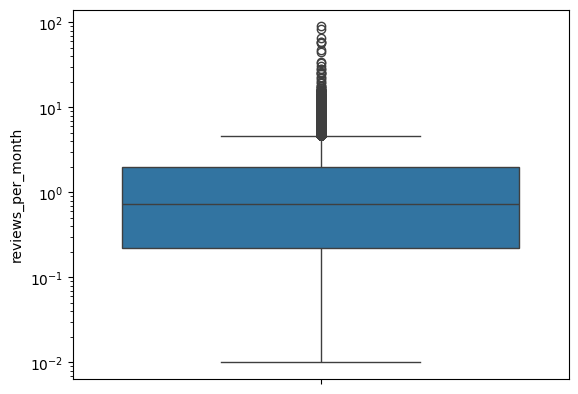

In [94]:
sns.boxplot(data=df1, y='reviews_per_month')
plt.yscale('log')
plt.show()

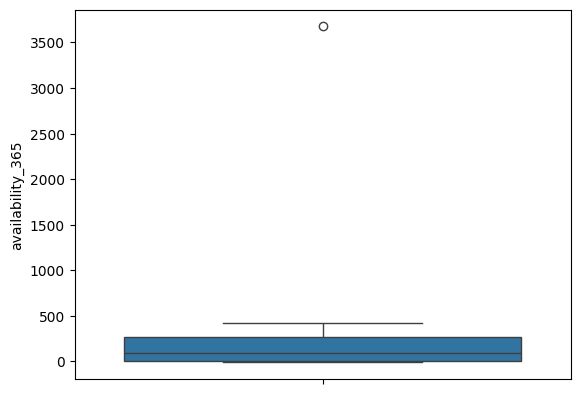

In [95]:
sns.boxplot(data=df1, y='availability_365')
plt.show()

In [106]:
df1['last_review'] = pd.to_datetime(df1['last_review'])

In [146]:
df1['last_review'].head()

0   2021-10-19
1   2022-05-21
2          NaT
3   2019-07-05
4   2018-11-19
Name: last_review, dtype: datetime64[ns]

In [107]:
df1['last_review'].min(), df1['last_review'].median(), df1['last_review'].max()

(Timestamp('2012-07-11 00:00:00'),
 Timestamp('2019-06-14 00:00:00'),
 Timestamp('2058-06-16 00:00:00'))

In [108]:
## replace last_review that been dated after 2022 with median last_review considering first we need to convert the column to datetime  ##

df1.loc[df1[df1['last_review'].apply(lambda x:x.year)>2022].index, 'last_review'] = df1['last_review'].median()

In [109]:
df1.loc[df1['last_review'].apply(lambda x:x.year)>2022]

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license


In [110]:
#Replace null value with median last_review 
df1.loc[df1['last_review'].isnull(), 'last_review']= df1['last_review'].median()

In [114]:
df1['reviews_per_month'].median()

np.float64(0.79)

In [111]:
# do the same thing for reviews_per_month

df1.loc[df1['reviews_per_month'].isnull(), 'reviews_per_month']=df1['reviews_per_month'].median()

In [198]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError

def loc_from_coord(lat, long):
    try:
        location = geolocator.reverse(f"{lat},{long}", timeout=10)
        print(location.raw)  # Debug information
        if location and 'address' in location.raw:
            address = location.raw['address']
            # Attempt to retrieve a more granular location if 'suburb' is not available
            return address.get('borough', address.get('city', address.get('town', address.get('village', 'Unknown'))))
        else:
            return 'Unknown'
    except (GeocoderTimedOut, GeocoderServiceError) as e:
        print(f"Error: {e}")
        return 'Error'


In [112]:
print(loc_from_coord(40.72828, -73.98801))

NameError: name 'loc_from_coord' is not defined

In [62]:
print(loc_from_coord(40.68346, -73.96374))

Brooklyn


In [175]:
df1.drop('country_code', axis=1, inplace=True)

In [173]:
df1.loc[df1['host_identity_verified'].isnull(), 'host_identity_verified']='unconfirmed'


In [177]:
df1.loc[df1['availability_365'].isnull(), 'availability_365']=df1['availability_365'].median()

In [181]:
df1.loc[df1['price'].isnull(), 'price']= df1['price'].median()

In [120]:
idx = df1.loc[~df1['service_fee'].isnull()].index
df1.loc[idx, 'service_fee'] = df1.loc[idx].apply(lambda x:re.sub(r'\D', '', x['service_fee']), axis=1)

TypeError: expected string or bytes-like object, got 'float'

In [116]:
# To convert $ or anyhing that is not digit or nan to '' in service fee

idx = df1.loc[~df1['service_fee'].isnull()].index
df1.loc[idx, 'service_fee'] = df1.loc[idx].apply(lambda x:re.sub(r'\D','',x['service_fee']),axis=1)

In [117]:
df1['service_fee'] = pd.to_numeric(df1['service_fee'])

In [118]:
df1['service_fee'] = df1['service_fee'].fillna(df1['service_fee'].median())

In [202]:
df1.minimum_nights.min() , df1.minimum_nights.max()

(np.float64(0.0), np.float64(13.5))

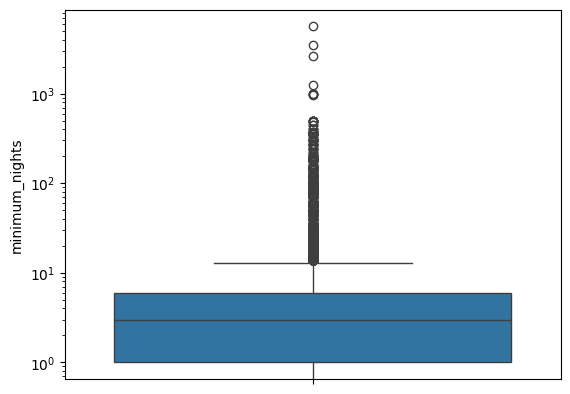

In [195]:
sns.boxplot(data=df1, y='minimum_nights')
plt.yscale('log')
plt.show()

In [199]:
Q1 = df1['minimum_nights'].quantile(0.25)
Q3 = df1['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
upper_bound

np.float64(13.5)

In [201]:
df1['minimum_nights'].clip(lower=0, upper=13.5, inplace=True)

/var/folders/bv/47b81dz97_52w35v_gn9825h0000gn/T/ipykernel_957/3325766789.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['minimum_nights'].clip(lower=0, upper=13.5, inplace=True)


In [205]:
median = df1['minimum_nights'].median()

In [206]:
df1['minimum_nights'] = df1['minimum_nights'].fillna(3)

In [213]:
df1['review_rate_number'].fillna(df1['review_rate_number'].median(),inplace=True)

/var/folders/bv/47b81dz97_52w35v_gn9825h0000gn/T/ipykernel_957/2860866959.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['review_rate_number'].fillna(df1['review_rate_number'].median(),inplace=True)


In [215]:
df1['Construction_year'].fillna(df1['Construction_year'].median(), inplace=True)

/var/folders/bv/47b81dz97_52w35v_gn9825h0000gn/T/ipykernel_957/3103275824.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Construction_year'].fillna(df1['Construction_year'].median(), inplace=True)


In [217]:
df1['number_of_reviews'].fillna(df1['number_of_reviews'].median(), inplace=True)

/var/folders/bv/47b81dz97_52w35v_gn9825h0000gn/T/ipykernel_957/2846130067.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['number_of_reviews'].fillna(df1['number_of_reviews'].median(), inplace=True)


In [218]:
df1['calculated_host_listings_count'].fillna(df1['calculated_host_listings_count'].median(), inplace=True)

/var/folders/bv/47b81dz97_52w35v_gn9825h0000gn/T/ipykernel_957/117120287.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['calculated_host_listings_count'].fillna(df1['calculated_host_listings_count'].median(), inplace=True)


In [219]:
df1.cancellation_policy.fillna('moderate', inplace=True)

/var/folders/bv/47b81dz97_52w35v_gn9825h0000gn/T/ipykernel_957/1972601848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.cancellation_policy.fillna('moderate', inplace=True)


In [221]:
df1.instant_bookable.fillna(True, inplace=True)

/var/folders/bv/47b81dz97_52w35v_gn9825h0000gn/T/ipykernel_957/714832131.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.instant_bookable.fillna(True, inplace=True)
/var/folders/bv/47b81dz97_52w35v_gn9825h0000gn/T/ipykernel_957/714832131.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.instant_bo

In [222]:
df1.isna().sum().sort_values(ascending=False)

id                                0
NAME                              0
host_id                           0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room_type                         0
Construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
house_rules                       0
dtype: int64

In [225]:
df1.to_csv('clean_airbnb_data.csv',mode='w', index=False)

In [229]:
!brew install postgresql


==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Auto-updated Homebrew!
Updated 3 taps (homebrew/services, homebrew/core and homebrew/cask).
==> New Formulae
codeberg-cli               kube-bench                 netatalk
codesnap                   libsvgtiny                 termbg
==> New Casks
font-atkinson-hyperlegible-mono          font-nanum-square-round
font-atkinson-hyperlegible-next          macai
font-nanum-square                        satdump
font-nanum-square-neo                    serial-studio

You have 6 outdated formulae installed.

==> Downloading https://ghcr.io/v2/homebrew/core/postgresql/14/manifests/14.15
######################################################################### 100.0%
==> Fetching postgresql@14
==> Downloading https://ghcr.io/v2/homebrew/core/postgresql/14/blobs/sha256:821c
##############################

In [230]:
!pip install  sqlalchemy psycopg2

  Using cached SQLAlchemy-2.0.37-cp313-cp313-macosx_10_13_x86_64.whl.metadata (9.6 kB)
  Using cached psycopg2-2.9.10.tar.gz (385 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 180.1 kB/s eta 0:00:00a 0:00:02
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Created wheel for psycopg2: filename=psycopg2-2.9.10-cp313-cp313-macosx_14_0_x86_64.whl size=144677 sha256=173714b23ecd9b65aa9c28842b6e82e7dce029a5ab758609fdde074d0f68a906
  Stored in directory: /Users/saeedazad/Library/Caches/pip/wheels/d1/02/6b/6fab072a7ac365814e6d6217fef5525fa5ac3c64204a418040
Successfully built psycopg2


In [60]:
from sqlalchemy import create_engine

# Replace the placeholders with your database credentials
DATABASE_TYPE = 'postgresql'
DBAPI = 'psycopg2'
USER = 'saeedazad'
PASSWORD = '2431'
HOST = 'localhost'
PORT = 5432
DATABASE = 'HomeStay'

# Create the engine
engine = create_engine(f'{DATABASE_TYPE}+{DBAPI}://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}')


In [233]:
# Assuming df is your DataFrame
df1.to_sql('airbnb_data', engine, index=False, if_exists='replace')  # Use 'append' if you want to add to an existing table


305

In [12]:
values = df1['reviews_per_month'].values
values

array([0.21, 0.38,  nan, ...,  nan, 0.1 ,  nan], shape=(102599,))

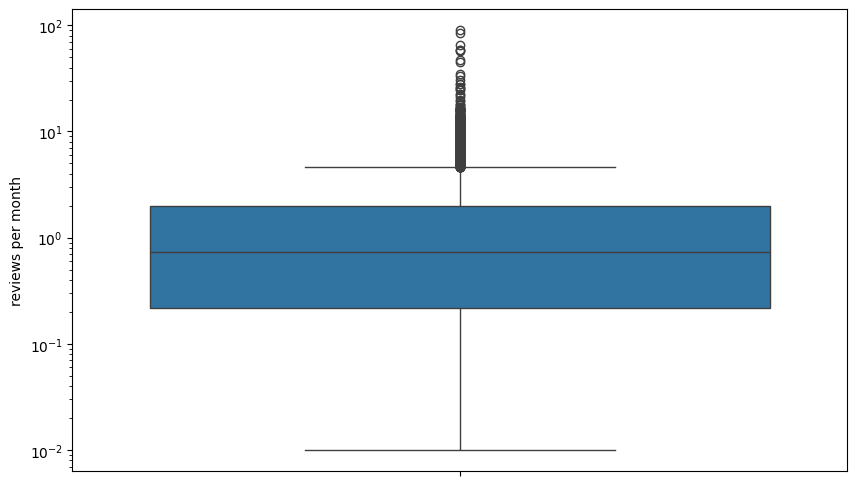

In [17]:
# Create a boxplot
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample right-skewed data
values = df1['reviews_per_month'].values

# Create the figure and boxplot
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(10, 6))
sns.boxplot(y='reviews per month', data=df)
plt.yscale('log')
plt.show()




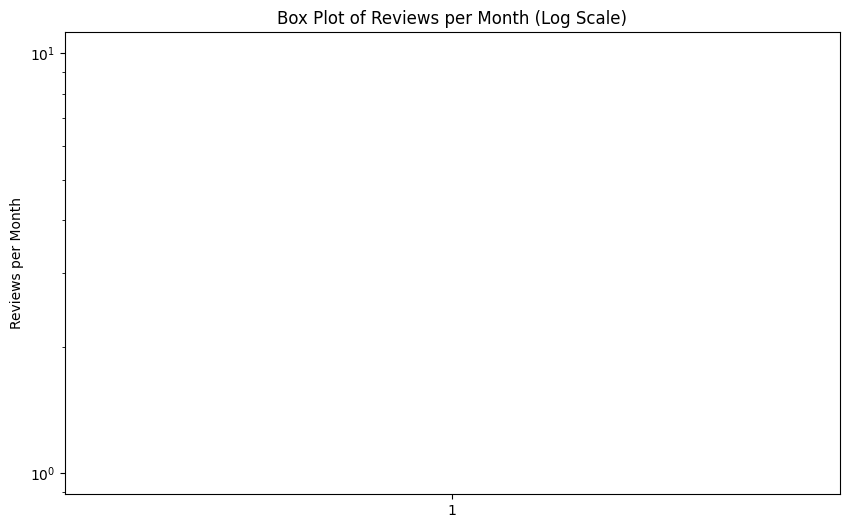

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'df'
reviews = df1['reviews_per_month']

plt.figure(figsize=(10, 6))
plt.boxplot(reviews, vert=True, patch_artist=True)
plt.yscale('log')
plt.ylabel('Reviews per Month')
plt.title('Box Plot of Reviews per Month (Log Scale)')
plt.show()


In [ ]:
grouped = df1.groupby('neighbourhood_group')['price'].mean()

In [ ]:
grouped

In [8]:
#!pip install matplotlib
import matplotlib.pyplot as plt

In [ ]:
#Top 10 most expensive neighbourhoods
data = df1.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:10]

In [ ]:
data

In [ ]:
# 10 suburbs with the most airbnb locations 
top_neighbourhoods = df1.groupby('neighbourhood')['host_id'].count().sort_values(ascending=False)[:10]

In [ ]:
top_neighbourhoods

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(top_neighbourhoods.index, top_neighbourhoods.values, color='skyblue')
plt.xticks(rotation=45)
plt.show()

In [ ]:
top_neighbourhoods.plot(kind='bar', color='skyblue')
plt.show()

In [ ]:
top_reviewd_listing = df[['host id', 'NAME','number of reviews', 'neighbourhood']].sort_values(by='number of reviews',
                                                                                                ascending=False).head(10)

In [ ]:
top_reviewd_listing

In [ ]:
#scatter find relationship between price and number of reviews
plt.figure(figsize=(10,6))
plt.scatter(df1['price'], df1['number of reviews'], color='skyblue', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Price vs. Number of Reviews')
plt.show()


In [ ]:
# find null values 
null_values = df.isnull()

In [ ]:
null_values

In [ ]:
df1.isna().sum()

In [ ]:
import seaborn as sns
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='price')
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()



In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import scipy.stats as stats
stats.probplot(df1['price'], dist="norm", plot=plt)
plt.show()

In [ ]:
print(df1['price'].describe())
print(f"Skewness: {df1['price'].skew()}")
print(f"Kurtosis: {df1['price'].kurt()}")


In [ ]:
from scipy import stats

# Compute Z-scores
df1['z_score_price'] = stats.zscore(df1['price'])
outliers_z = df1[(df1['z_score_price'] > 3) | (df1['z_score_price'] < -3)]
print(f'Number of outliers detected using Z-scores: {len(outliers_z)}')


In [123]:
Q1 = df1['price'].quantile(0.25)
Q3 = df1['price'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers_iqr = df1[(df1['price'] < (Q1 - 1.5 * IQR)) | (df1['price'] > (Q3 + 1.5 * IQR))]
print(f'Number of outliers detected using IQR: {len(outliers_iqr)}')


Number of outliers detected using IQR: 0


In [121]:
data = df1.groupby(['neighbourhood']).agg({'price':'mean', 'review_rate_number':'mean'}).sort_values(by='price', ascending=False).round(2)

In [122]:
data.head(10)

,price,review_rate_number
neighbourhood,,
New Dorp,1045.00,3.25
"Chelsea, Staten Island",1042.00,2.00
Fort Wadsworth,1024.00,2.00
Little Neck,817.75,3.88
Jamaica Hills,812.90,2.67
Arden Heights,804.89,3.78
Midland Beach,796.18,3.29
Shore Acres,792.26,3.78
Mill Basin,775.14,3.79


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data["review_rate_number"], data["price"], alpha=0.5)
plt.show()

In [ ]:
data = df1['neighbourhood_group'][df1['neighbourhood']=='Arden Heights'].unique()
data

In [ ]:
group = df1.loc[df1['neighbourhood']=='Arden Heights', ['neighbourhood_group', 'price']].round(1)[:2]

In [ ]:
group

In [ ]:
host_ids = df1.groupby('host_id')['id'].count()
multiple_properties = host_ids[host_ids>1].index
multiple_properties